In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
path_train="/content/drive/MyDrive/Colab_Notebooks/Train_machinehack.csv"
path_test="/content/drive/MyDrive/Colab_Notebooks/Test_machinehack.csv"
df_train=pd.read_csv(path_train)
df_test=pd.read_csv(path_test)

Importing all the libraries, checking the first few rows in the data set & finding the shape

In [ ]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [ ]:
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [ ]:
df_train.shape

(284780, 8)

In [ ]:
df_test.shape

(122049, 7)

In [ ]:
df_train.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


Finding the missing values

In [ ]:
df_train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df_test.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df_train.dtypes

InvoiceNo        int64
StockCode        int64
Description      int64
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country          int64
dtype: object

Extracting month coulmn to check if it has any relationship with the variable

In [ ]:
df_train['month'] = pd.DatetimeIndex(df_train['InvoiceDate']).month
df_test['month'] = pd.DatetimeIndex(df_test['InvoiceDate']).month

dropping the columns invoice number invoice date & customer ID

In [ ]:
df_train.drop(["InvoiceNo","InvoiceDate"],axis=1,inplace=True)
df_test.drop(["InvoiceNo","InvoiceDate"],axis=1,inplace=True)

Finding the negative values in quantity column & replacing them with mean values & then rounding off

In [ ]:
df_train["Quantity"]=df_train["Quantity"].mask(df_train.Quantity < 1).fillna(df_train["Quantity"].mean())
df_train["Quantity"]=round(df_train["Quantity"]).astype("int")
df_test["Quantity"]=df_test["Quantity"].mask(df_test.Quantity < 1).fillna(df_test["Quantity"].mean())
df_test["Quantity"]=round(df_test["Quantity"]).astype("int")


In [ ]:
df_train.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,month
0,1583,144,3,3.75,14056.0,35,5
1,1300,3682,6,1.95,13098.0,35,5
2,2178,1939,4,5.95,15044.0,35,11
3,2115,2983,1,0.83,15525.0,35,11
4,1210,2886,12,1.65,13952.0,35,5


Data pre-processing remioving outliers & checking for skewness 

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_train))

print(z)
threshold = 3


[[0.01139539 1.72503032 0.04780555 ... 0.71877745 0.32269957 0.76495649]
 [0.32407026 1.52140665 0.03360172 ... 1.2775952  0.32269957 0.76495649]
 [0.71670303 0.07795447 0.04307094 ... 0.14246019 0.32269957 0.99159747]
 ...
 [1.07442275 1.4755271  0.04307094 ... 0.31103882 0.32269957 0.76495649]
 [0.00309766 0.97727518 0.16525192 ... 0.24629063 0.32269957 0.69883848]
 [1.2204942  0.79642822 0.05254016 ... 1.33974848 0.32269957 0.11332049]]


In [ ]:
print(np.where(z > 3))
print(np.where(z1 > 3))

(array([    20,     25,     72, ..., 284707, 284725, 284768]), array([5, 5, 5, ..., 5, 5, 5]))
(array([     9,     18,     47, ..., 122017, 122020, 122020]), array([4, 4, 4, ..., 4, 2, 4]))


In [ ]:
df_train = df_train[(z < 3).all(axis=1)]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

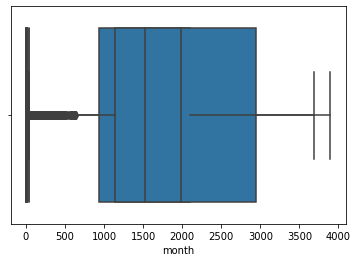

In [ ]:
import seaborn as sns
sns.boxplot(df_train["StockCode"])
sns.boxplot(df_train["Description"])
sns.boxplot(df_train["Quantity"])
sns.boxplot(df_train["UnitPrice"])
sns.boxplot(df_train["Country"])
sns.boxplot(df_train["month"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


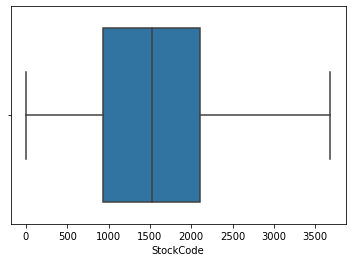

In [ ]:
sns.boxplot(df_test["StockCode"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9a847d710>,
      dtype=object)

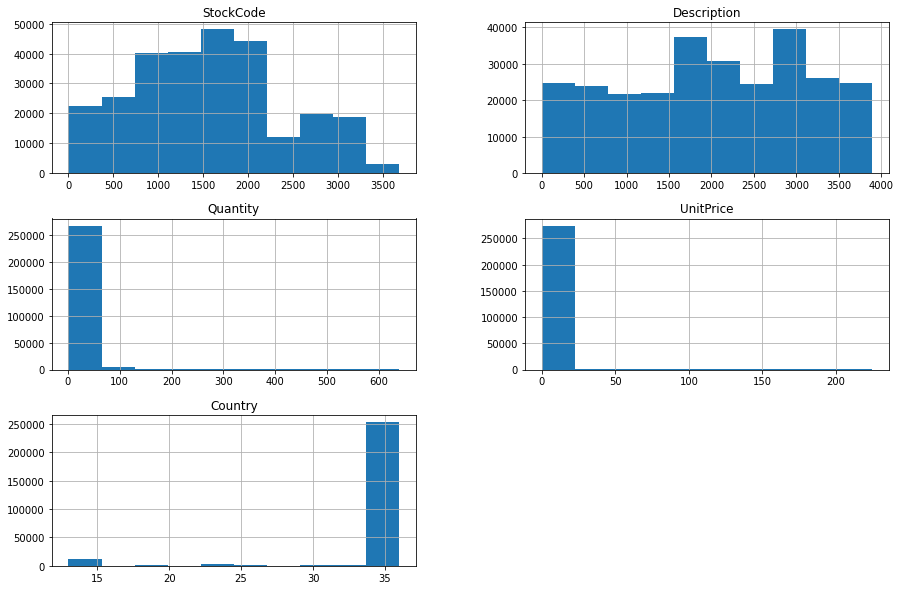

In [ ]:
cols = ['StockCode','Description','Quantity','UnitPrice','Country']
df_train[cols].hist(figsize=(15,10))

In [ ]:
df_train.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,month
0,1583,144,3,3.75,14056.0,35,5
1,1300,3682,6,1.95,13098.0,35,5
2,2178,1939,4,5.95,15044.0,35,11
3,2115,2983,1,0.83,15525.0,35,11
4,1210,2886,12,1.65,13952.0,35,5


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 11.57 and sigma = 27.12
Skewness: 10.266597
Kurtosis: 154.692887


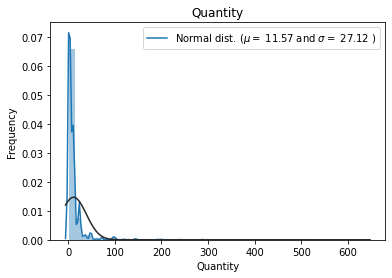

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats   
import scipy.special 

sns.distplot(df_train['Quantity'], fit=scipy.stats.norm);

# fit a gaussian function to Rental Price
(mu, sigma) = scipy.stats.norm.fit(df_train['Quantity'])

# mean, std, skewness and kurtosis
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
print("Skewness: %f" % df_train['Quantity'].skew())
print("Kurtosis: %f" % df_train['Quantity'].kurt())

# plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Quantity')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 1.64 and sigma = 1.19
Skewness: 0.375852
Kurtosis: -0.242666


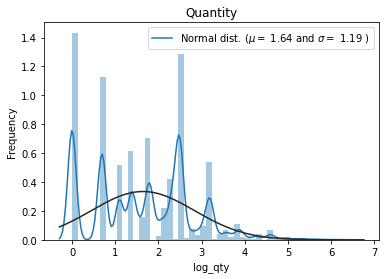

In [ ]:
df_train["log_qty"]=np.log(df_train["Quantity"])
df_test["log_qty"]=np.log(df_test["Quantity"])
sns.distplot(df_train["log_qty"], fit=scipy.stats.norm);

# fit a gaussian function to Rental Price
(mu, sigma) = scipy.stats.norm.fit(df_train["log_qty"])

# mean, std, skewness and kurtosis
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
print("Skewness: %f" % df_train["log_qty"].skew())
print("Kurtosis: %f" % df_train["log_qty"].kurt())

# plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Quantity')
plt.show()

Changing the country column into categorical & applying label codes

In [ ]:
df_train['Country'] = df_train['Country'].astype('category')

In [ ]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df_train["Country_cat"]= le.fit_transform(df_train["Country"]) 
df_train["Country_cat"]= le.fit_transform(df_train["Country"])
df_test["Country_cat"]= le.fit_transform(df_test["Country"]) 
df_test["Country_cat"]= le.fit_transform(df_test["Country"])

In [ ]:
df_train.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,month,log_qty,Country_cat
0,1583,144,3,3.75,14056.0,35,5,1.098612,22
1,1300,3682,6,1.95,13098.0,35,5,1.791759,22
2,2178,1939,4,5.95,15044.0,35,11,1.386294,22
3,2115,2983,1,0.83,15525.0,35,11,0.000000,22
4,1210,2886,12,1.65,13952.0,35,5,2.484907,22


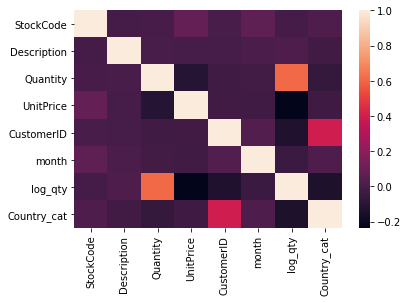

In [ ]:
corr=df_train.corr()
sns.heatmap(corr)

In [ ]:

df_train.drop(["Quantity","CustomerID","Country"],axis=1,inplace=True)
df_test.drop(["Quantity","CustomerID","Country"],axis=1,inplace=True)


In [ ]:
df_train.head()
X_1=df_train[["StockCode","Description","log_qty","Country_cat","month"]]
y_1=df_train[["UnitPrice"]]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_1,y_1,test_size=0.3,random_state=50)
X_test.shape

(82426, 5)

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)
predictions = LR.predict(X_test)
print(predictions)
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))


[[3.45261675]
 [3.17056892]
 [3.3786458 ]
 ...
 [4.82599789]
 [2.59650819]
 [1.87499814]]
Test RMSE: 4.157947706967821


In [ ]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 48)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_predictions = rf.predict(X_test)
print('Test random forest RMSE:',np.sqrt(mean_squared_error(y_test,rf_predictions)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Test random forest RMSE: 1.8933852621378935


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=1000)
ada.fit(X_train, y_train)
ada_predictions = ada.predict(X_test)
print('Test random forest RMSE:',np.sqrt(mean_squared_error(y_test,ada_predictions)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test random forest RMSE: 4.498846842767635


In [ ]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
xgb_predictions = model.predict(X_test)
print('Test random forest RMSE:',np.sqrt(mean_squared_error(y_test,xgb_predictions)))

[06:00:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test random forest RMSE: 3.468331227933926


The RMSE using randomforest is the lowest Hence using for predicting test data

In [ ]:
y_pred_test = rf.predict(df_test)
print(y_pred_test)
submissions_f = pd.DataFrame(y_pred_test,columns = ['UnitPrice'])
print(submissions_f)
submissions_f.to_csv("/content/drive/MyDrive/Colab_Notebooks/Sample Submission_machinehack.csv")

[2.33093333 1.3714     2.6184     ... 1.0878     3.9472     3.5762    ]
        UnitPrice
0        2.330933
1        1.371400
2        2.618400
3        1.358800
4        9.349200
...           ...
122044   1.258400
122045   1.512400
122046   1.087800
122047   3.947200
122048   3.576200

[122049 rows x 1 columns]


Without country categorical & month + added customer ID

In [ ]:
X_2=df_train[["StockCode","Description","log_qty","Country"]]
y_2=df_train[["UnitPrice"]]

In [ ]:
#df_train.head()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_2,y_2,test_size=0.3,random_state=50)
X_test.shape

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)
predictions = LR.predict(X_test)
print(predictions)
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))


In [ ]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 48)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_predictions = rf.predict(X_test)
print('Test random forest RMSE:',np.sqrt(mean_squared_error(y_test,rf_predictions)))

In [ ]:
df_train.head()

In [ ]:
X_3=df_train[["StockCode","Description","Quantity","Country"]]
y_3=df_train[["UnitPrice"]]
X_train,X_test,y_train,y_test=train_test_split(X_3,y_3,test_size=0.3,random_state=50)

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)
predictions = LR.predict(X_test)
print(predictions)
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))

In [ ]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 48)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_predictions = rf.predict(X_test)
print('Test random forest RMSE:',np.sqrt(mean_squared_error(y_test,rf_predictions)))

In [ ]:
df_test.shape

(122049, 5)

In [ ]:
df_train.head()

,StockCode,Description,UnitPrice,month,log_qty,Country_cat
0,1583,144,3.75,5,1.098612,22
1,1300,3682,1.95,5,1.791759,22
2,2178,1939,5.95,11,1.386294,22
3,2115,2983,0.83,11,0.000000,22
4,1210,2886,1.65,5,2.484907,22
